# Final Project GEOG 313
### Lara Jordan
### 12/20/23
#### Versions
Python 3.11.4
eumdac 2.1.2
rasterio 1.3.7
xarray 2023.5.0
geopandas 0.13.2
numpy 1.24.3
gdal 3.7.0

## Summary of notebook
The objectives of this notebook are to allow you to find the the pixels with the greatest days of melt in a glaciated area, using ASCAT imagery. The example shown in this notebook looks at the Northern Patagonian Icefield(NPI) and Southern Patagonian Icefield(SPI). 

## Following the link below, create an account with EUMETSAT and enter your personal key and credentials below.

EUMETSAT DATA ACCESS CLIENT STEPS
https://eumetsatspace.atlassian.net/wiki/spaces/EUMDAC/pages/1760198661/Python+Library

Get personal key from: https://api.eumetsat.int/api-key/
- Username: ljordan
- Password: Geography313!

In [194]:
! mamba install eumdac --yes


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['eumdac']

[+] 0.0s
conda-forge/linux-64 ━━━━╸━━━━━━━━━━━━━━━╸━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0

In [213]:
import eumdac
import datetime
import shutil
from satpy import Scene
import rasterio 
from rasterio.plot import show
import zipfile
import os

In [214]:
# Insert your personal key and secret into the single quotes
consumer_key = 'AHAabjeIwqLyxr0vKS2iKp81w0Ya'
consumer_secret = '5AajUv0wOlECutvzOWQKQao2auIa'

credentials = (consumer_key, consumer_secret)

token = eumdac.AccessToken(credentials)

print(f"This token '{token}' expires {token.expiration}")

This token 'ecd5a36b-dc6f-3553-b6a7-9445dab3f04b' expires 2023-12-21 00:15:29.143258


#### Follow these steps from the EUMETSAT website to explore, select, and query collections.

In [215]:
#Explore collections
datastore = eumdac.DataStore(token)
#print(datastore.collections)

In [216]:
#Select collection
selected_collection = datastore.get_collection('EO:EUM:CM:METOP:ASCSZFR02')

In [10]:
#Search for availablle datasets within your area of interest definted as a polygon
# Add vertices for polygon, wrapping back to the start point.
geometry = [[-45.557248, -71.068567], [-51.949926, -72.432406],[-52.171001, -74.297779],[-48.449643, -75.438333],[-44.967704, -73.813447],[-45.557248, -71.068567]]

# Set sensing start and end time
start = datetime.datetime(2007, 10, 10)
end = datetime.datetime(2021, 11, 10)

# Retrieve datasets that match our filter
products = selected_collection.search(
    geo='POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in geometry])),
    dtstart=start, 
    dtend=end)
    
print(f'Found Datasets: {len(products)} datasets for the given time range')

#Prints list of all products

#for product in products:
#    print(str(product))

Found Datasets: 15203 datasets for the given time range


## Download selected products and define function to unzip and delete (Don't run download)
Here I ran the the function for 3 downloads as a demonstration and then interrputed the code because I will not be using those images do to conversion issues.

In [13]:
#Define function to unzip files and delete zipfile
def unzipdelete(zippath):
    #Extract contents of zip file to new folder 'extracted'
    with zipfile.ZipFile(zippath, 'r') as zip_ref:
        zip_ref.extractall('extracted')
    #Delete zip after extraction
    os.remove(zippath)

Download of product ASCA_SZF_1B_M02_20140331235400Z_20140401013900Z_R_O_20140528192238Z_0200 finished.
Download of product ASCA_SZF_1B_M02_20140331120900Z_20140331135059Z_R_O_20140528192003Z_0200 finished.
Download of product ASCA_SZF_1B_M02_20140331084800Z_20140331102959Z_R_O_20140528191854Z_0200 finished.


KeyboardInterrupt: 

In [ ]:
#Download all products from above search
for product in products:
    with product.open() as fsrc, open(fsrc.name, mode='wb') as fdst:
        shutil.copyfileobj(fsrc, fdst)
        print(f'Download of product {product} finished.')

        #Call function to unzip and delete downloaded file
        unzipdelete(fdst.name)

#### These are the steps to convert Native format (.nat) to geotiff. However it does not work with the selected collection which is why for this final project I am using my own raster files.
This conversion the satpy and gdal methods only work if using satpy/gdal supported formats, not ASCAT, therefore not applicable to this collection. I ran this and interrupted the code to show the problems with converting the format.

In [8]:
#Satpy method
file = "ASCA_SZF_1B_M02_20140331084800Z_20140331102959Z_R_O_20140528191854Z_0200.nat"
# define reader
reader = "avhrr_l1b_eps"
# read the file
scn = Scene(filenames = {reader:[file]})
# extract data set names
dataset_names = scn.all_dataset_names()
# print available datasets
print('\n'.join(map(str, dataset_names)))

No filenames found for reader: avhrr_l1b_eps
Don't know how to open the following files: {'ASCA_SZF_1B_M02_20140331084800Z_20140331102959Z_R_O_20140528191854Z_0200.nat'}


ValueError: No supported files found

In [24]:
#Gdal method
raster = rasterio.open("ASCA_SZF_1B_M02_20140331084800Z_20140331102959Z_R_O_20140528191854Z_0200.nat")
show(raster)

RasterioIOError: 'ASCA_SZF_1B_M02_20140331084800Z_20140331102959Z_R_O_20140528191854Z_0200.nat' not recognized as a supported file format.

## Start running notebook from here.

#### From this point on I reference raster files I have downloaded separately, but they are the same images as the ones downloaded above. We discovered too late that there is no way to convert .nat files so instead I had to convert to .rst in Terrset.

In [1]:
import geopandas as gpd
import rasterio
import xarray as xr
import rasterio.mask
import os
import numpy as np
from osgeo import gdal
from osgeo import osr
import matplotlib.pyplot as plt
from rasterio.plot import show

## Visualize Study Area
The following shapefiles were downloaded separately from https://www.arcgis.com/apps/webappviewer/index.html?id=8c39c2cafd2942c98876c0f474db3b3a which contains detailed polygons of the NPI and SPI. I uploaded these files to the working folder along with its supporting files. Below I read and open the two shapefiles and an example raster file for visualization of the study area.

In [2]:
#Read in shapefiles and read example raster file.
NPI = gpd.read_file('shapefiles/NPI2.shp')
SPI = gpd.read_file('shapefiles/SPI2.shp')
raster = rasterio.open("images/R_msfa-a-SAm07-003-007.RST")

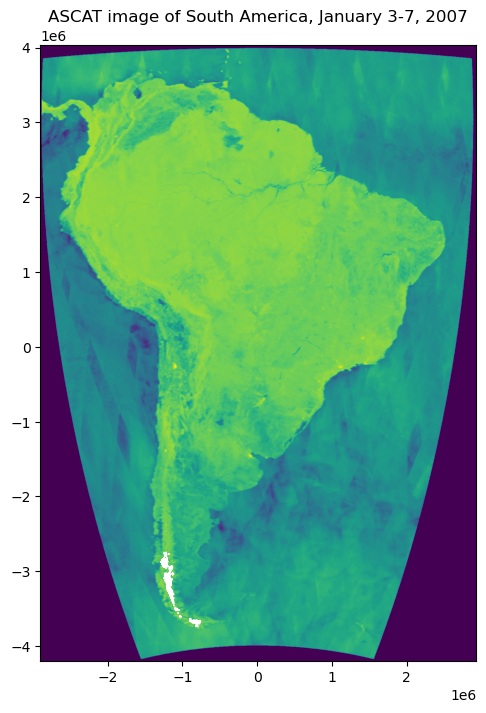

In [3]:
#Plot raster data with shapefile overlayed
fig, ax = plt.subplots(figsize=(8, 8))
show(raster, ax=ax, origin='lower')

NPI.plot(ax=ax, facecolor='none', edgecolor='white')
SPI.plot(ax=ax, facecolor='none', edgecolor='white')

plt.title("ASCAT image of South America, January 3-7, 2007")

plt.show()

## Define function to mask raster files to shapefile
Now we will read in all of the raster files in the "images" folder and clip them to the bounds of each othe the polygons for easier visualization of the study areas. The spatial resolution of the raster images is 4km so the mask includes all pixels touching the borders of the polygons. The first step is to define a function that uses a shapefile to mask a raster image and update metadata, and then define a function that opens and applys the mask to each raster file, by calling "mask_raster" within "apply_mask". The function returns an xarray data array.

In [8]:
#Define function to use a shapefile as a mask to a raster file.
def mask_raster(src_raster_path, shp_file_path):
    #Read shp file to geodataframe
    gdf = gpd.read_file(shp_file_path)

    #Open raster file
    with rasterio.open(src_raster_path) as src:
        #Mask raster using shp file geometries
        out_image, out_transform = mask(src, gdf.geometry, crop=True)
        out_meta = src.meta

    #Update metadata for output raster
    out_meta.update({"driver": "RST",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    #Return masked raster as a NumPy array
    return out_image, out_meta

## Define function to read in raster files and shapefiles and apply to mask_raster function

In [9]:
#Define folder with all raster images
raster_folder = "images/"

#Define function to open raster file and apply mask function to each file.
def apply_mask(raster_folder,shp_file_path):
    #Initialize empty list to store masked rasters and metadata
    masked_rasters_list = []

    #Loop through raster files in folder and apply masking function
    for raster_file in os.listdir(raster_folder):
        if raster_file.endswith(".RST"):
            src_raster_path = os.path.join(raster_folder, raster_file)
            masked_raster, metadata = mask_raster(src_raster_path, shp_file_path)

            #Append masked raster and metadata to list
            masked_rasters_list.append((masked_raster, metadata))

    #Extract metadata from the first masked raster
    first_masked_raster, first_metadata = masked_rasters_list[0]

    #Convert list of arrays to 3D NumPy array
    stacked_data = np.stack([masked_raster[0] for masked_raster, _ in masked_rasters_list], axis=0)

    #Create coordinate values for the 'time', 'y', and 'x' dimensions
    time_values = np.arange(1, stacked_data.shape[0] + 1)

    #Create xarray DataArray
    data_array = xr.DataArray(stacked_data, dims=('time', 'y', 'x'), 
                              coords={'time': time_values,
                                      'y': range(stacked_data.shape[1]),
                                      'x': range(stacked_data.shape[2])},
                              attrs=first_metadata)

    #Print resulting xarray DataArray
    print(data_array)
    
    return data_array

Here the two data arrays that will be used throughout the notebook are created, one for each icefield. Only two years (2007 and 2008) are read in. The temporal frequency of the images is bidiurnal (every other day).

In [91]:
#Create NPI data array
NPI = "shapefiles/NPI2.shp"
NPI_array = apply_mask(raster_folder, NPI)

<xarray.DataArray (time: 359, y: 62, x: 35)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..

In [92]:
#Create SPI data array
SPI = "shapefiles/SPI2.shp"
SPI_array = apply_mask(raster_folder, SPI)

<xarray.DataArray (time: 359, y: 162, x: 111)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, 

## Convert 2-byte values to decibel values
Now we need to convert the 2-byte values that ASCAT imagery is released in, to decible values for measuring backscatter. The equation below is the conversion equation, and is applied to both NPI and SPI arrays.

In [123]:
#Define function to apply dB conversion equation to all values in data array
def convert_dB(data_array):
    return (data_array / 1000.0) - 30.0 + 32767.0 / 1000.0

<xarray.DataArray ()>
array(2.767)
Coordinates:
    time     int64 9
    y        int64 30
    x        int64 30

In [ ]:
#Call function for each data array
converted_NPI = convert_dB(NPI_array)
converted_SPI = convert_dB(SPI_array)

## Convert all values above 0 to NaN
Once all values are converted to dB, we can convert all values above 0 to NaN values, so that in our calculations later, the mean is not effected by outliers. Values above 0 are removed because most melt backscatter will start around -4 dB and lower. Any values that are positive are corner reflectors like cities, or missing values.

In [124]:
converted_NPI = converted_NPI.where(converted_NPI < 0, np.nan)
converted_SPI = converted_SPI.where(converted_SPI < 0, np.nan)

## Visualize backscatter for NPI and SPI
Here we visualize backscatter values throughout the two study areas. This was surprising to me because the NPI values should be lower, between values of -5 and -17 the same way the SPI values are. Im not sure why these values are so high.

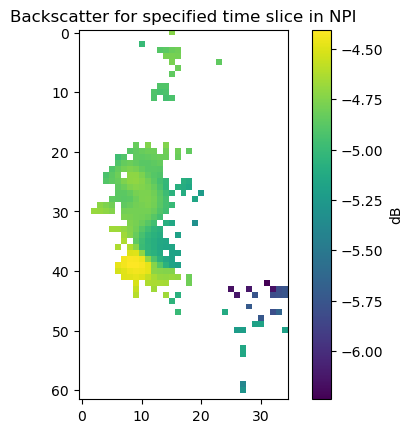

In [224]:
npi = plt.imshow(converted_NPI.sel(time=5))
plt.title("Backscatter for specified time slice in NPI")
plt.colorbar(npi, label="dB")

plt.show()

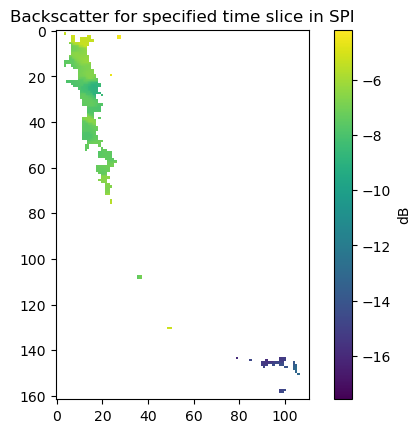

In [227]:
spi = plt.imshow(converted_SPI.sel(time=190))
plt.title("Backscatter for specified time slice in SPI")
plt.colorbar(spi, label="dB")
plt.show()

# Visualize backscatter as a histogram for NPI and SPI
Here we can visualize backscatter values for both areas as a histogram. Again, the range of the NPI values seems too high to me.

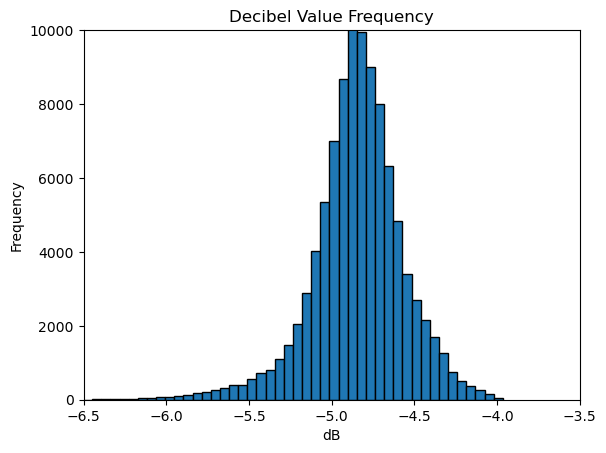

In [184]:
#Flatten converted NPI array
flattened_data = converted_NPI.values.flatten()

#Plot histogram
fig, axhist = plt.subplots(1, 1)
hist_values, bin_edges, _ = axhist.hist(flattened_data, bins=50, edgecolor='black')
axhist.set_title("Decibel Value Frequency")
axhist.set_xlabel("dB")
axhist.set_ylabel("Frequency")

axhist.set_xlim([-6.5, -3.5])
axhist.set_ylim([0, 10000])

plt.show()

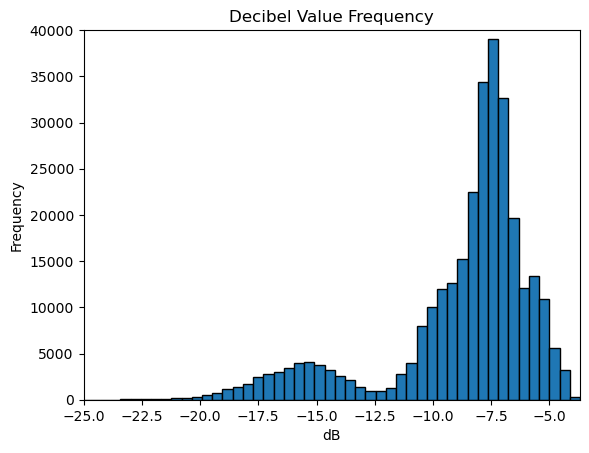

In [186]:
#Flatten converted SPI array
flattened_data = converted_SPI.values.flatten()

#Plot histogram
fig, axhist = plt.subplots(1, 1)
hist_values, bin_edges, _ = axhist.hist(flattened_data, bins=50, edgecolor='black')
axhist.set_title("Decibel Value Frequency")
axhist.set_xlabel("dB")
axhist.set_ylabel("Frequency")

axhist.set_xlim([-25, -3.7])
axhist.set_ylim([0, 40000])

plt.show()

## Plot average backscatter values per day to visualize temporal trends
Here we calculate the mean value per day in order to plot the two study areas against eachother. Here we can see well the much brighter seeming values of the NPI as compared to the SPI. Another strange thing to me is the lack of presence of a melting and freezing season. Typically, you should be able to see the seasonality in the backscatter values. Although this graph is only showing two years, seasonality should be present.

In [187]:
def mean_values(data_array):
    return data_array.mean(dim=('y', 'x'))

mean_NPI = mean_values(converted_NPI)
mean_SPI = mean_values(converted_SPI)

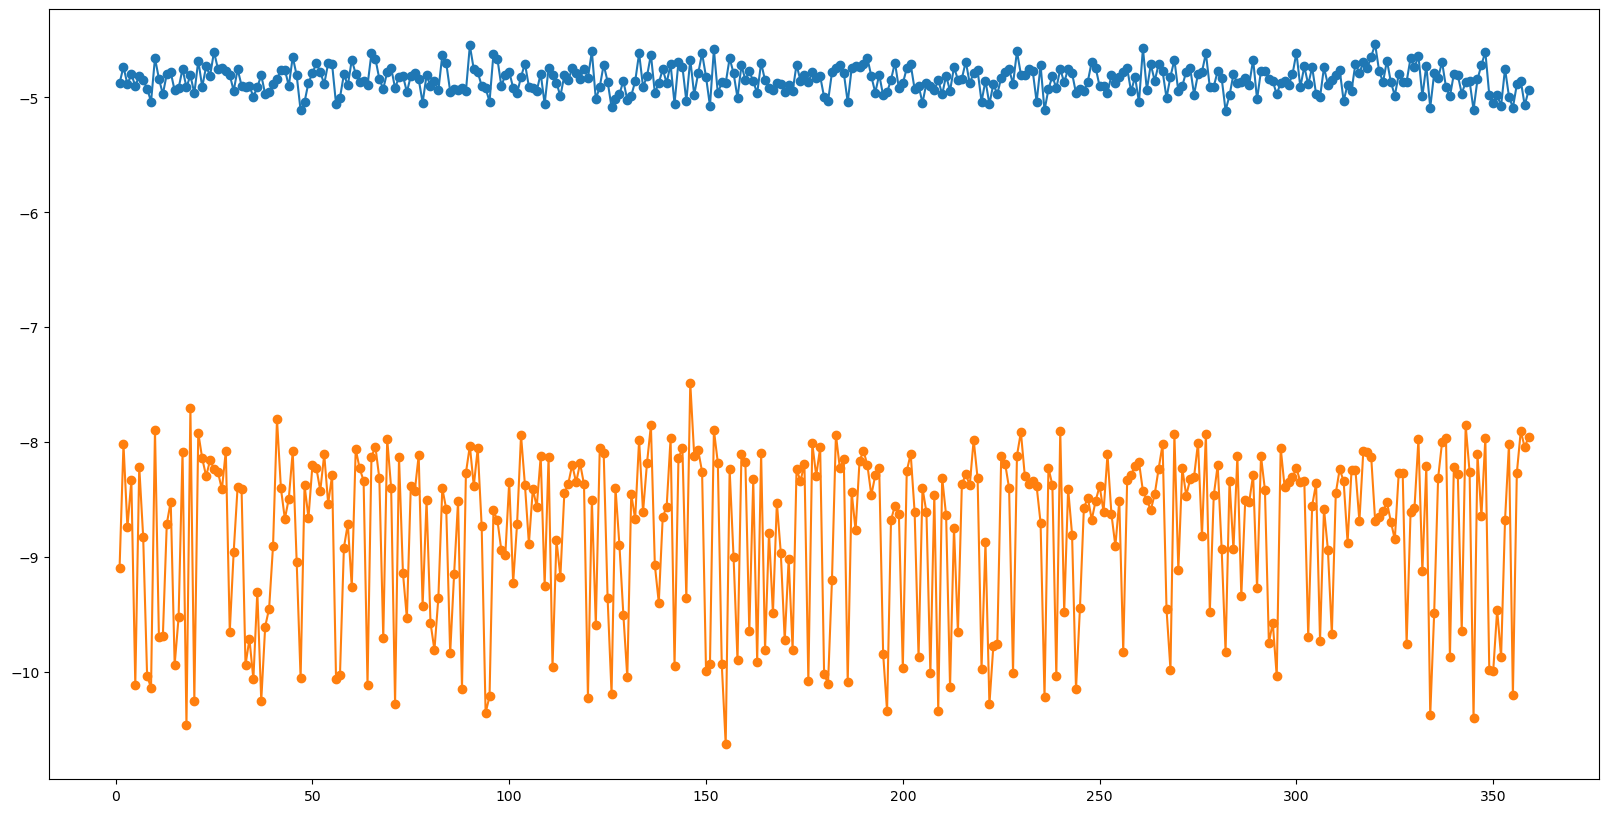

In [188]:
plt.figure(figsize=(10 * 2, 10))

plt.plot(mean_NPI.time, mean_NPI, marker='o')
plt.plot(mean_SPI.time, mean_SPI, marker='o')

plt.show()

## Define Threshold
Although the seasonal backscatter plot lacks a strong seasonality pattern, I can estimate a threshold value for each study area. That threshold value is used to reclass each icefield array to one boolean image per year. The images represent melt/non-melt days during that year, which will be added up to find which pixels have the highest and lowest days of melt.

In [189]:
#Reclassify images to boolean. All values equal to or less than threshold are reclassified to 1, all other values reclassified to 0.
def reclass_array(data_array, threshold_value):
    return xr.where(data_array <= threshold_value, 1, 0)

reclass_NPI = reclass_array(converted_NPI, -4.9)
reclass_SPI = reclass_array(converted_SPI, -8.9)

# Final visualization showing pixels with greatest days of melt
The images per year are added up to get a final map that shows the frequency of melt days throughout the study area.

In [191]:
sum_values_SPI = reclass_SPI.sum(dim='time')
sum_values_NPI = reclass_NPI.sum(dim='time')

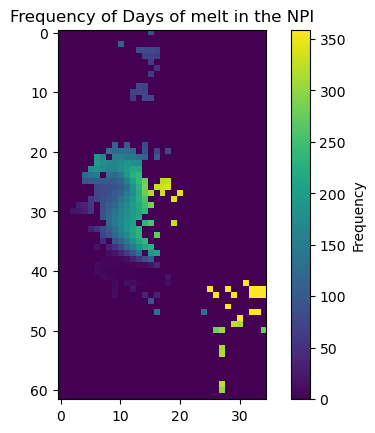

In [219]:
final_npi = plt.imshow(sum_values_NPI)
plt.title("Frequency of Days of melt in the NPI")
plt.colorbar(final_npi, label="Frequency")

plt.show()

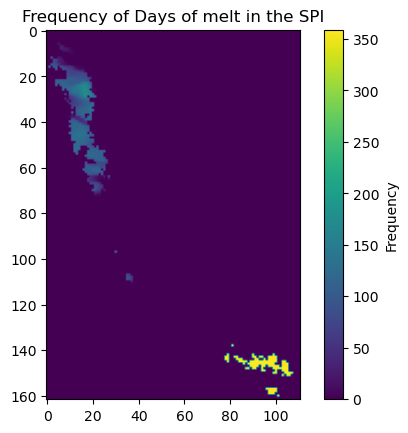

In [220]:
final_spi = plt.imshow(sum_values_SPI)
plt.title("Frequency of Days of melt in the SPI")
plt.colorbar(final_spi, label="Frequency")
plt.show()

### Discussion
This notebook was created as demonstration of how days of melt can be calculated using Python. However this analysis only uses 2 years of data which is not enough to make any big conclusions. Only two years were used because of issues with space using the jupyter notebook. However from the two years we can see that the NPI has many more days of melt in the easter borders of the icefield. The SPI seems to have much greater days of melt in the southern portion. Something I probably would do different next time is removing that southern section of the SPI because it is technically the Cordillera Darwin Icefield and not the Southern Patagonian Icefield. That we we could see more detailed results of the main SPI only.